# Medical Diagnosis with Naive Bayes

You work for a medical research institute, and your task is to develop a diagnostic system using the Naive Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to aid in the medical diagnosis process. Answer the following questions based on this case study:

1. Data Exploration:

a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.

2. Data Preprocessing:

a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.

b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

3. Feature Engineering:

a. Describe how to convert the medical test results and patient Information into suitable features for the Naive Bayes model.

b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

4. Implementing Naive Bayes:

a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.

b. Split the dataset into training and testing sets.

5. Model Training:

a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.

6. Model Evaluation:

a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.

b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

7. Laplace Smoothing:

a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.

b. Discuss the impact of Laplace smoothing on model performance.

8. Real-World Application:

a. Describe the importance of accurate medical diagnosis in healthcare and research.

b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

9. Model Limitations:

a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in

which it may not perform well.

10. Presentation and Recommendations:

a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive

Bayes in healthcare.

In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
data = pd.read_csv('day4patient.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['CustomerId']=le.fit_transform(data['CustomerId'])
data['Surname']=le.fit_transform(data['Surname'])
data['Geography']=le.fit_transform(data['Geography'])
#data['Sore Throat']=le.fit_transform(data['Sore Throat'])
#data['Penile Oedema']=le.fit_transform(data['Penile Oedema'])
#data['Oral Lesions']=le.fit_transform(data['Oral Lesions'])
#data['Solitary Lesion']=le.fit_transform(data['Solitary Lesion'])
#data['Swollen Tonsils']=le.fit_transform(data['Swollen Tonsils'])
#data['HIV Infection']=le.fit_transform(data['HIV Infection'])
#data['Sexually Transmitted Infection']=le.fit_transform(data['Sexually Transmitted Infection'])
#data['MonkeyPox']=le.fit_transform(data['MonkeyPox'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,2736,1115,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,3258,1177,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,2104,2040,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,5435,289,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,6899,1822,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
x=data.iloc[:,1:3]
x.head()

,CustomerId,Surname
0,2736,1115
1,3258,1177
2,2104,2040
3,5435,289
4,6899,1822


In [41]:
y=data.iloc[:,3:4]
y.head()

,CreditScore
0,619
1,608
2,502
3,699
4,850


# Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print('Training Data Shape')
print()
print('Training data-X- shape:\t',xtrain.shape)
print()
print('Training data-Y- shape:\t',ytrain.shape)
print()
print('Testing Data Shape')
print()
print('Testing data(X-Input) shape:\t',xtest.shape)
print()
print('Testing data(Y-Input) shape:\t',ytest.shape)

Training Data Shape

Training data-X- shape:	 (8000, 2)

Training data-Y- shape:	 (8000, 1)

Testing Data Shape

Testing data(X-Input) shape:	 (2000, 2)

Testing data(Y-Input) shape:	 (2000, 1)


In [44]:
bayes_model=GaussianNB()
print('***Naive Bayes Gaussian********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Gaussian********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [850 850 850 ... 850 850 850]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.021

Confusion Matrix:
 [[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 42]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         414       0.00      0.00      0.00         1
         415       0.00      0.00      0.00         1
         416       0.00      0.00      0.00         1
         418       0.00      0.00      0.00         1
         420       0.00      0.00      0.00         1
         421       0.00      0.00      0.00         1
         422       0.00      0.00      0.00         1
         425      

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metr

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'Surname'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Geography'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

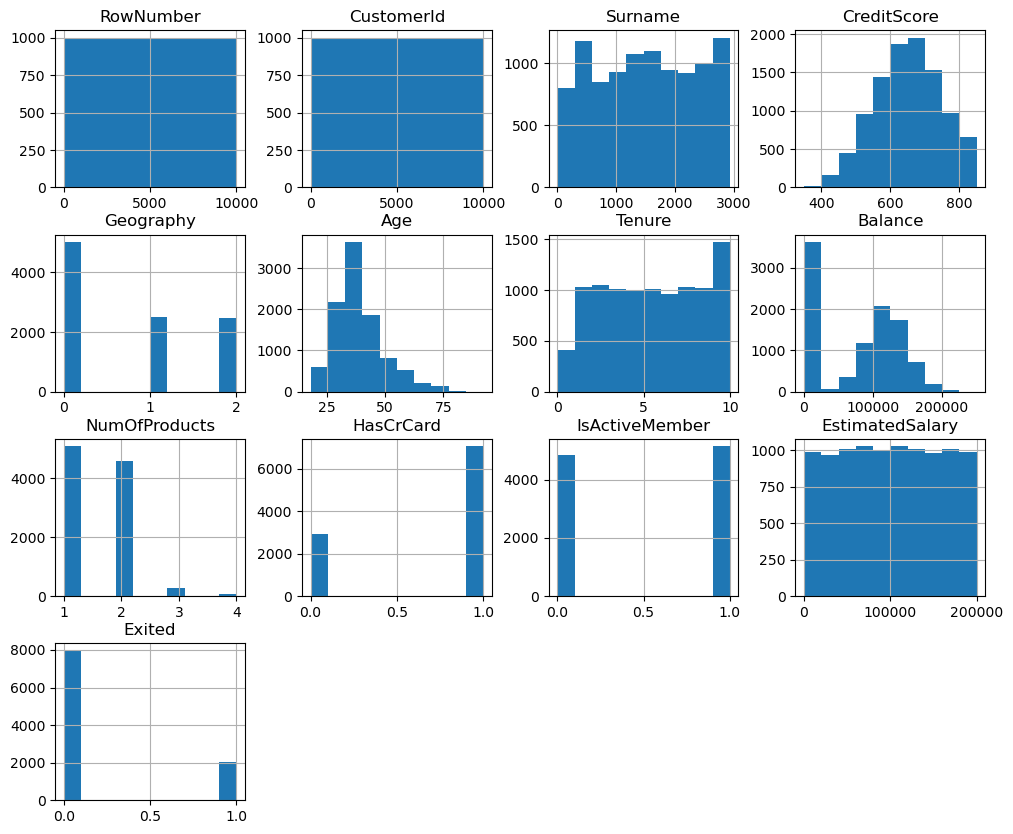

In [46]:
data.hist(figsize=(12,10))

# Multinomial Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB
bayes_model=MultinomialNB()
print('***Naive Bayes Multinomial********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Multinomial********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [358 776 358 ... 645 426 843]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.0035

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         358       0.00      0.00      0.00         0
         359       0.00      0.00      0.00         0
         365       0.00      0.00      0.00         0
         367       0.00      0.00      0.00         0
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         407       0.00      0.00      0.00         0
         408       0.00      0.00      0.00         0
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         412       0.00      0.00      0.00         0
         414       0.00      0.00      0.00         1

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metr

In [ ]:
#Bernoulli Naive Bayes

In [49]:
from sklearn.naive_bayes import BernoulliNB
bayes_model=BernoulliNB()
print('***Naive Bayes Bernoulli********')
print('Training Phase\n')
bayes_model. fit (xtrain, ytrain)
print('Training is completed')
print('*'*100)
print()
print('Testing Phase\n')
ypred=bayes_model.predict(xtest)
print('Prdicted Class Labels are: \n',ypred)
print('Test is also done')
print()
print('*'*100)

***Naive Bayes Bernoulli********
Training Phase

Training is completed
****************************************************************************************************

Testing Phase

Prdicted Class Labels are: 
 [850 850 850 ... 850 850 850]
Test is also done

****************************************************************************************************


C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print()
print('Confusion Matrix:\n',confusion_matrix(ytest,ypred))
print()
print('Classification report :\n',classification_report(ytest,ypred))

Accuracy Score:	 0.021

Confusion Matrix:
 [[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  1]
 ...
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  4]
 [ 0  0  0 ...  0  0 42]]

Classification report :
               precision    recall  f1-score   support

         350       0.00      0.00      0.00         2
         351       0.00      0.00      0.00         1
         401       0.00      0.00      0.00         1
         405       0.00      0.00      0.00         1
         410       0.00      0.00      0.00         1
         411       0.00      0.00      0.00         2
         414       0.00      0.00      0.00         1
         415       0.00      0.00      0.00         1
         416       0.00      0.00      0.00         1
         418       0.00      0.00      0.00         1
         420       0.00      0.00      0.00         1
         421       0.00      0.00      0.00         1
         422       0.00      0.00      0.00         1
         425      

C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SIRISHA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
